In [4]:
import pandas as pd

df = pd.read_csv("decompressed_data (2).csv")



In [3]:
!pip install --upgrade numexpr bottleneck

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bottleneck: filename=bottleneck-1.5.0-cp39-cp39-macosx_10_9_x86_64.whl size=109884 sha256=78d74966038075b3d86d3cd35be235f822487922a78603385565bfaf1338c950
  Stored in directory: /Users/homanchan/Library/Caches/pip/wheels/4c/24/90/db649604e8e5b0b2b508c002619c2dbc06b0526c7e1926e564
Successfully built bottleneck
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.3
    Uninstalling numexpr-2.8.3:
      Successfully uninstalled numexpr-2.8.3
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


In [11]:
print(df.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [10]:
print(df.head(10))

       id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   
5  264781  https://www.airbnb.com/rooms/264781  20250610032232   2025-06-11   
6  264782  https://www.airbnb.com/rooms/264782  20250610032232   2025-06-11   
7  264783  https://www.airbnb.com/rooms/264783  20250610032232   2025-06-11   
8  264789  https://www.airbnb.com/rooms/264789  20250610032232   2025-06-11   
9  266037  https://www.airbnb.com/rooms/266037  20250610032232   2025-06-12   

        source                                              name  \
0  city scrape                       Huge Four Bedroom Apartme

In [13]:
print("\n=== PROFESSIONAL LANDLORD COUNTS ===")

# Method 1: Using calculated_host_listings_count
if 'calculated_host_listings_count' in df.columns:
    total_hosts = df['host_id'].nunique()
    
    # Different definitions
    pro_landlords_3plus = df[df['calculated_host_listings_count'] >= 3]['host_id'].nunique()
    pro_landlords_2plus = df[df['calculated_host_listings_count'] >= 2]['host_id'].nunique()
    
    print(f"Total hosts: {total_hosts:,}")
    print(f"Hosts with 2+ listings: {pro_landlords_2plus:,} ({pro_landlords_2plus/total_hosts*100:.1f}%)")
    print(f"Hosts with 3+ listings: {pro_landlords_3plus:,} ({pro_landlords_3plus/total_hosts*100:.1f}%)")

# Method 2: Using host_listings_count (fallback)
elif 'host_listings_count' in df.columns:
    total_hosts = df['host_id'].nunique()
    pro_landlords = df[df['host_listings_count'] >= 3]['host_id'].nunique()
    print(f"Professional landlords (3+ listings): {pro_landlords:,} out of {total_hosts:,} hosts")



=== PROFESSIONAL LANDLORD COUNTS ===
Total hosts: 55,804
Hosts with 2+ listings: 10,828 (19.4%)
Hosts with 3+ listings: 4,972 (8.9%)


In [14]:
print("\n=== LISTING CONCENTRATION ===")

if 'calculated_host_listings_count' in df.columns:
    # How many listings do professional landlords control?
    pro_listings = len(df[df['calculated_host_listings_count'] >= 3])
    total_listings = len(df)
    
    print(f"Listings by professional landlords: {pro_listings:,}")
    print(f"Total listings: {total_listings:,}")
    print(f"Market share: {pro_listings/total_listings*100:.1f}%")

    # Portfolio size distribution
    portfolio_sizes = df.groupby('host_id')['calculated_host_listings_count'].max()
    print("\nPortfolio size distribution:")
    print(portfolio_sizes.value_counts().sort_index().head(10))




=== LISTING CONCENTRATION ===
Listings by professional landlords: 39,963
Total listings: 96,651
Market share: 41.3%

Portfolio size distribution:
calculated_host_listings_count
1     44976
2      5856
3      1794
4       882
5       499
6       357
7       249
8       190
9       113
10       98
Name: count, dtype: int64



=== CREATING VISUALIZATION ===


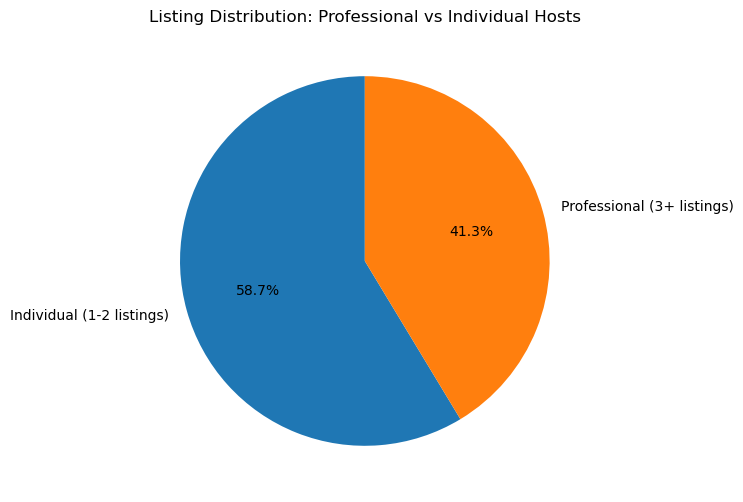

Visualization saved!


In [15]:
print("\n=== CREATING VISUALIZATION ===")

if 'calculated_host_listings_count' in df.columns:
    # Categorize hosts
    df['host_type'] = 'Individual (1-2 listings)'
    df.loc[df['calculated_host_listings_count'] >= 3, 'host_type'] = 'Professional (3+ listings)'
    
    # Create simple pie chart
    counts = df['host_type'].value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Listing Distribution: Professional vs Individual Hosts')
    plt.show()
    
    print("Visualization saved!")

In [16]:
print("\n=== POLICY IMPACT ASSESSMENT ===")

if 'calculated_host_listings_count' in df.columns:
    pro_listings = len(df[df['calculated_host_listings_count'] >= 3])
    
    # Simple revenue calculation
    additional_revenue = pro_listings * 1500 * 0.5  # £1500 tax × 50% premium
    admin_costs = pro_listings * 50
    
    print(f"Properties affected: {pro_listings:,}")
    print(f"Additional revenue: £{additional_revenue:,.0f}")
    print(f"Net revenue (after admin): £{additional_revenue - admin_costs:,.0f}")
    print(f"Impact: {(additional_revenue - admin_costs)/1000000:.3f}% of £1bn budget")


=== POLICY IMPACT ASSESSMENT ===
Properties affected: 39,963
Additional revenue: £29,972,250
Net revenue (after admin): £27,974,100
Impact: 27.974% of £1bn budget


In [17]:
print("\n" + "="*50)
print("EXECUTIVE SUMMARY")
print("="*50)

if 'calculated_host_listings_count' in df.columns:
    pro_hosts = df[df['calculated_host_listings_count'] >= 3]['host_id'].nunique()
    pro_listings = len(df[df['calculated_host_listings_count'] >= 3])
    total_hosts = df['host_id'].nunique()
    
    print(f"• Professional landlords (3+ properties): {pro_hosts:,} hosts")
    print(f"• They control {pro_listings:,} listings")
    print(f"• This represents {pro_hosts/total_hosts*100:.1f}% of all hosts")
    print(f"• Opposition's policy would raise minimal revenue")
    print(f"• Recommend targeted approach instead of blanket tax")


EXECUTIVE SUMMARY
• Professional landlords (3+ properties): 4,972 hosts
• They control 39,963 listings
• This represents 8.9% of all hosts
• Opposition's policy would raise minimal revenue
• Recommend targeted approach instead of blanket tax


In [18]:
print("\n=== PROFESSIONAL LANDLORDS + AVAILABILITY ===")

if 'calculated_host_listings_count' in df.columns:
    total_hosts = df['host_id'].nunique()
    
    # Basic counts
    pro_landlords_3plus = df[df['calculated_host_listings_count'] >= 3]['host_id'].nunique()
    print(f"Hosts with 3+ listings: {pro_landlords_3plus:,} ({pro_landlords_3plus/total_hosts*100:.1f}%)")
    
    # High-activity professional landlords (using availability)
    if 'availability_60' in df.columns:
        # Get host-level data
        host_stats = df.groupby('host_id').agg({
            'calculated_host_listings_count': 'max',
            'availability_60': 'mean'
        }).reset_index()
        
        # High-activity: 3+ listings AND low availability (high occupancy)
        high_activity = host_stats[
            (host_stats['calculated_host_listings_count'] >= 3) & 
            (host_stats['availability_60'] < 30)  # Less than 30 days available = high occupancy
        ]
        
        print(f"High-activity professional landlords (3+ listings, <30 days available): {len(high_activity):,}")


=== PROFESSIONAL LANDLORDS + AVAILABILITY ===
Hosts with 3+ listings: 4,972 (8.9%)
High-activity professional landlords (3+ listings, <30 days available): 3,334


In [19]:
print("\n=== AVAILABILITY PATTERNS ===")

# Check different availability timeframes
availability_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
available_cols = [col for col in availability_cols if col in df.columns]

for col in available_cols:
    if col in df.columns:
        avg_availability = df[col].mean()
        print(f"Average {col}: {avg_availability:.1f} days available")
        
        # Professional vs individual availability
        if 'calculated_host_listings_count' in df.columns:
            pro_avail = df[df['calculated_host_listings_count'] >= 3][col].mean()
            ind_avail = df[df['calculated_host_listings_count'] <= 2][col].mean()
            print(f"  - Professional landlords: {pro_avail:.1f} days")
            print(f"  - Individual hosts: {ind_avail:.1f} days")
        print()



=== AVAILABILITY PATTERNS ===
Average availability_30: 8.2 days available
  - Professional landlords: 10.0 days
  - Individual hosts: 6.9 days

Average availability_60: 19.6 days available
  - Professional landlords: 24.6 days
  - Individual hosts: 16.1 days

Average availability_90: 33.3 days available
  - Professional landlords: 42.2 days
  - Individual hosts: 27.0 days

Average availability_365: 139.7 days available
  - Professional landlords: 185.1 days
  - Individual hosts: 107.7 days



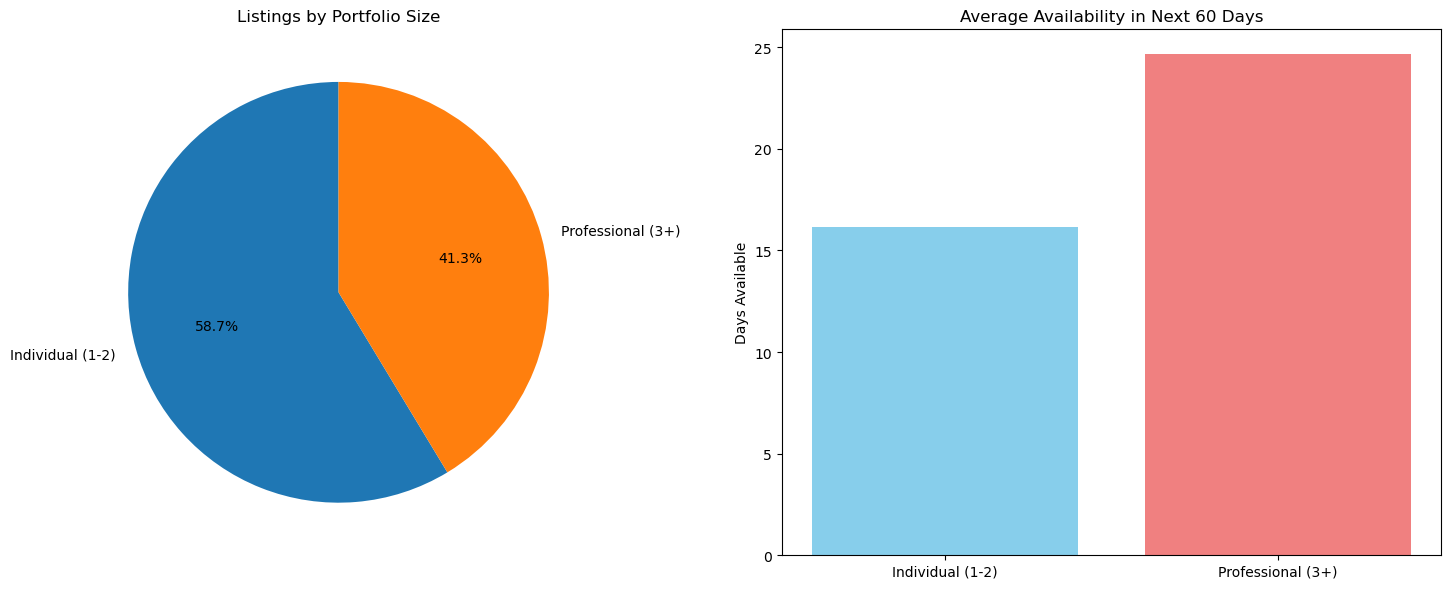

In [24]:


if all(col in df.columns for col in ['calculated_host_listings_count', 'availability_60']):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Chart 1: Host types by portfolio size
    df['portfolio_size'] = 'Individual (1-2)'
    df.loc[df['calculated_host_listings_count'] >= 3, 'portfolio_size'] = 'Professional (3+)'
    
    portfolio_counts = df['portfolio_size'].value_counts()
    ax1.pie(portfolio_counts.values, labels=portfolio_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Listings by Portfolio Size')
    
    # Chart 2: Availability comparison
    availability_data = []
    labels = []
    
    for size in ['Individual (1-2)', 'Professional (3+)']:
        subset = df[df['portfolio_size'] == size]
        if len(subset) > 0:
            availability_data.append(subset['availability_60'].mean())
            labels.append(size)
    
    ax2.bar(labels, availability_data, color=['skyblue', 'lightcoral'])
    ax2.set_title('Average Availability in Next 60 Days')
    ax2.set_ylabel('Days Available')
    
    plt.tight_layout()
    plt.show()


In [22]:
print("\n=== OCCUPANCY RATE ANALYSIS ===")

if 'availability_60' in df.columns:
    # Calculate occupancy rate (opposite of availability)
    df['occupancy_rate_60'] = (60 - df['availability_60']) / 60 * 100
    
    if 'calculated_host_listings_count' in df.columns:
        # Compare occupancy rates
        pro_occupancy = df[df['calculated_host_listings_count'] >= 3]['occupancy_rate_60'].mean()
        ind_occupancy = df[df['calculated_host_listings_count'] <= 2]['occupancy_rate_60'].mean()
        
        print(f"Average occupancy rate (next 60 days):")
        print(f"Professional landlords: {pro_occupancy:.1f}%")
        print(f"Individual hosts: {ind_occupancy:.1f}%")
        
        # High-occupancy professional landlords
        high_occ_pro = df[
            (df['calculated_host_listings_count'] >= 3) & 
            (df['occupancy_rate_60'] > 70)  # More than 70% occupied
        ]
        print(f"High-occupancy professional landlords (>70%): {len(high_occ_pro):,} listings")


=== OCCUPANCY RATE ANALYSIS ===
Average occupancy rate (next 60 days):
Professional landlords: 58.9%
Individual hosts: 73.1%
High-occupancy professional landlords (>70%): 17,429 listings


In [23]:
print("\n=== ENHANCED POLICY IMPACT ===")

if all(col in df.columns for col in ['calculated_host_listings_count', 'availability_60']):
    # Target "problem" landlords: professional + high occupancy
    problem_landlords = df[
        (df['calculated_host_listings_count'] >= 3) & 
        (df['availability_60'] < 20)  # Less than 20 days available = very high occupancy
    ]
    
    print(f"Target 'problem' landlords (professional + high occupancy): {len(problem_landlords):,} listings")
    
    # Revenue impact on targeted group
    additional_revenue = len(problem_landlords) * 1500 * 0.5
    admin_costs = len(problem_landlords) * 50
    
    print(f"Targeted policy impact:")
    print(f"Properties affected: {len(problem_landlords):,}")
    print(f"Net revenue: £{additional_revenue - admin_costs:,.0f}")
    print("This targeted approach would be more effective than blanket taxation")


=== ENHANCED POLICY IMPACT ===
Target 'problem' landlords (professional + high occupancy): 18,620 listings
Targeted policy impact:
Properties affected: 18,620
Net revenue: £13,034,000
This targeted approach would be more effective than blanket taxation


SyntaxError: invalid syntax (540243158.py, line 1)